<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center>- Pandas의 모든 것을 배우지 않습니다. 데이터 전처리에 대한 부분만 학습 대상이 됩니다 -</center>

# 학습 목표

- 다양한 방법으로 결측치(NaN 값) 존재 여부를 확인할 수 있습니다.
- 결측치를 제거하거나 다른 값으로 채울 수 있습니다.
- 중복된 데이터를 확인하여 제거할 수 있습니다.
- 가변수를 만들어 기존 데이터프레임에 연결할 수 있습니다.
- 깔끔한 데이터를 만들기 위해 데이터 재 구조화 작업을 할 수 있습니다.

# 6. 데이터프레임 변경 - 2단계

- 정확한 데이터 분석을 위해서는 정확한 데이터가 준비되어야 합니다.
- 정확한 데이터 준비를 위해 누락된 데이터나 중복 데이터를 제거하는 전처리 작업이 필요합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

## 6.1. 결측치 처리

- NaN 값, 즉 결측치는 정확한 분석을 방해합니다.
- NaN 값을 만나면 오류가 발생하는 함수도 있습니다.
- NaN 값은 제거하든지 다른 값(예를 들면 평균값)으로 채워야 합니다.

In [2]:
# titanic 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(file_path, sep = ',',) 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southhampton


### 6.1.1. 결측치 찾기

- 결측치 존재 여부를 확인하고 이를 어떻게 처리할 지 방법을 결정해야 합니다.
- 결측치를 확인할 수 있는 방법은 참 많습니다.

**1) info() 메소드로 확인**
- 다른 열의 데이터 개수와 비교하여 결측치 존재 여부를 알 수 있습니다.

In [3]:
# 열 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


**2) count() 메소드로 확인**

- 다른 열의 데이터 개수와 비교하여 결측치 존재 여부를 알 수 있습니다.

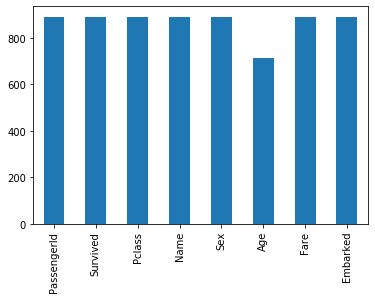

In [5]:
# 열 데이터 개수 확인
titanic.count()
titanic.count().plot(kind ='bar')

**3) value_counts() 메소드로 확인**

- 필히 **dropna=False** 옵션을 지정해야 결측치가 확인됩니다.

In [6]:
# Age 열 데이터 별 개수 확인
titanic['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

**4) isnull(), notnull() 메소드 사용**

- **isnull()** 메소드: 결측치면 True, 유효한 값이면 False를 반환합니다.
- **notnull()** 메소드: 결측치면 False, 유효한 값이면 True를 반환합니다.


In [7]:
# 전체 데이터 중에서 결측치는 True로 표시
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False


- True의 개수를 확인하는 것도 의미가 있습니다.

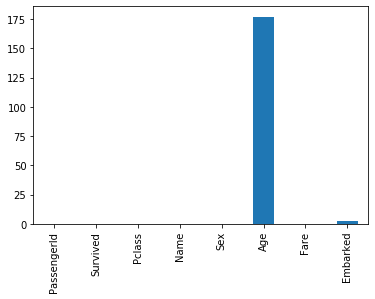

In [9]:
# 전체 데이터 중에서 결측치는 True 인 값 개수
titanic.isnull().sum()
titanic.isnull().sum().plot(kind = 'bar')

### 6.1.2. 결측치 제거

- **dropna()** 메소드로 결측치가 있는 열이나 행을 제거할 수 있습니다.
- inplacce=True 옵션을 지정해 해당 데이터프레임을 변경할 수 있습니다.

**1) 결측치가 하나라도 있으면 제거**

In [10]:
# 결측치가 하나라도 있는 행 제거
titanic2 = titanic.copy()
titanic2.dropna(inplace=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   Fare         712 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


In [11]:
# Age 열에 결측치가  있는 행 제거
titanic2 = titanic.copy()
titanic2.dropna(subset=['Age'], inplace=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         714 non-null    float64
 7   Embarked     712 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 50.2+ KB


In [12]:
# Embarked 열에 결측치가  있는 행 제거
titanic2 = titanic.copy()
titanic2.dropna(subset=['Embarked'], inplace=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.5+ KB


### 6.1.3. 결측치 채우기

- **fillna()** 메소드를 사용해 결측치를 다른 값으로 채울 수 있습니다.

**1) 평균값으로 채우기**

- 결측치가 있는 열의 평균값을 구한 후 결측치를 그 값으로 채웁니다.

In [13]:
# 데이터프레임 복사
titanic2 = titanic.copy()

# Age 평균 구하기
mean_age = titanic2['Age'].mean()

# 누락된 값을 평균값으로 채우기
titanic2['Age'].fillna(mean_age, inplace=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


**2) 가장 많이 나타나는 값으로 채우기**

- 결측치가 있는 열의 가장 빈도가 높은 값을 구한 후 결측치를 그 값으로 채웁니다.
- **idxmax()** 메소드를 사용해 가장 많이 나타나는 값을 찾을 수 있습니다.

In [14]:
# 가장 빈도가 높은 Embarked 열 값 구하기
most_freq_Embarked = titanic2['Embarked'].value_counts(dropna=True).idxmax()
print(most_freq_Embarked)

Southhampton


In [15]:
# 결측치를 가장 빈도가 높은 값으로 채우기
titanic2['Embarked'].fillna(most_freq_Embarked, inplace=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


**3) 직전 행의 값 또는 바로 다음 행의 값으로 채우기**

- 결측치를 바로 앞의 값이나 바로 다음에 나오는 값으로 채웁니다.
- **method='ffill'**: 바로 앞의 값으로 변경
- **method='bfill'**: 바로 다음 값으로 채움

In [16]:
# 데이터프레임 복사
titanic2 = titanic.copy()

# Age 열의 누락된 값을 바로 앞의 값으로 채우기
titanic2['Age'].fillna(method='ffill', inplace=True)

# Embarked 열의 누락된 값을 바로 뒤의 값으로 채우기
titanic2['Embarked'].fillna(method='bfill', inplace=True)

# 확인
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


**4) 결측치를 특정 값으로 채우기**

- 필요하다면 모든 결측치를 특정 값으로 채웁니다.

In [17]:
# 데이터프레임 복사
titanic2 = titanic.copy()

# 모든 누락된 값을 0으로 채우기
# titanic2.fillna(0, inplace=True)

# Age 열의 누락된 값을  0 으로 채우기
titanic2['Age'].fillna(0, inplace=True)
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

다음에 주어진 데이터프레임을 확인한 후 이어지는 셀을 완성해 보세요.

In [54]:
# 데이터프레임 만들기
dict = {'이름': ['나처럼', '즐거운', '사람이', '누구요'],
        '나이': [32, np.nan, 28, np.nan],
        '1월': [45600, np.nan, 46000, 50000],
        '2월': [56000, 23000, np.nan, 45000],
        '3월': [52000, 33000, 39000, 49000],
        }

df_test = pd.DataFrame(dict, index=['C001', 'C002', 'C003', 'C004'])
df_test.head()

,이름,나이,1월,2월,3월
C001,나처럼,32.0,45600.0,56000.0,52000
C002,즐거운,NaN,NaN,23000.0,33000
C003,사람이,28.0,46000.0,NaN,39000
C004,누구요,NaN,50000.0,45000.0,49000


In [55]:
# 나이 결측치는 모두 25로 변경
df_test['나이'].fillna(25, inplace = True)

# 확인
df_test.head()

,이름,나이,1월,2월,3월
C001,나처럼,32.0,45600.0,56000.0,52000
C002,즐거운,25.0,NaN,23000.0,33000
C003,사람이,28.0,46000.0,NaN,39000
C004,누구요,25.0,50000.0,45000.0,49000


In [56]:
# 1월, 2월, 3월 결측치는 각 월의 평균으로 채우기
mean_1 = df_test['1월'].mean() 
mean_2 = df_test['2월'].mean() 
mean_3 = df_test['3월'].mean() 

df_test['1월'].fillna(mean_1, inplace = True)
df_test['2월'].fillna(mean_2, inplace = True)
df_test['3월'].fillna(mean_3, inplace = True)

# 확인
df_test.head()


,이름,나이,1월,2월,3월
C001,나처럼,32.0,45600.0,56000.000000,52000
C002,즐거운,25.0,47200.0,23000.000000,33000
C003,사람이,28.0,46000.0,41333.333333,39000
C004,누구요,25.0,50000.0,45000.000000,49000


In [57]:
# 숫자는 모두 정수로 변경
# df_test = df_test.astype(int) : 이름 떄문에 안됨
df_test[['나이', '1월', '2월', '3월']] = df_test[['나이', '1월', '2월', '3월']].astype(int)

# 확인
df_test.head()


,이름,나이,1월,2월,3월
C001,나처럼,32,45600,56000,52000
C002,즐거운,25,47200,23000,33000
C003,사람이,28,46000,41333,39000
C004,누구요,25,50000,45000,49000


## 6.2. 중복된 데이터 처리

- 중복된 데이터는 분석 결과를 왜곡할 수 있으므로 중복 데이터에 대한 전처리가 필요합니다.

### 6.2.1. 중복 데이터 확인

- **duplicated()** 메소드로 중복된 행을 찾을 수 있습니다.
- **keep='first'**를 지정하면 앞쪽 행을 유지할 목적으로 중복을 확인합니다.
- **keep='last'**를 지정하면 뒤쪽 행을 유지할 목적으로 중복을 확인합니다.
- 전체 열이 중복된 행, 또는 일부 열이 중복된 행을 찾을 수 있습니다.

In [90]:
# 리스트로 데이터프레임 만들기
src = [[1, 2, 3, 4, np.nan],
       [1, 3, 5, 7, 9],
       [1, 2, 3, 4, np.nan],
       [1, 2, 3, 4, np.nan],
       [1, 3, 5, 7, 9],
       [2, 4, 6, 8, 0]]
df = pd.DataFrame(src, columns=list('ABCDE'))
df.head(10)

,A,B,C,D,E
0,1,2,3,4,NaN
1,1,3,5,7,9.0
2,1,2,3,4,NaN
3,1,2,3,4,NaN
4,1,3,5,7,9.0
5,2,4,6,8,0.0


**1) 모든 열이 중복된 행 찾기**

In [83]:
# 모든 열 값이 중복되는 행 확인
df.duplicated()

0    False
1    False
2     True
3     True
4     True
5    False
dtype: bool

In [84]:
# 앞쪽 행을 유지할 목적으로 모든 열 값이 중복되는 행 확인, 위 결과와 같음
df.duplicated(keep='first')

0    False
1    False
2     True
3     True
4     True
5    False
dtype: bool

In [85]:
# 뒤쪽 행을 유지할 목적으로 모든 열 값이 중복되는 행 확인
df.duplicated(keep='last')

0     True
1     True
2     True
3    False
4    False
5    False
dtype: bool

**2) 일부 열이 중복된 행 찾기**

In [86]:
# 앞쪽 행을 유지할 목적으로 'A' 열 값이 중복되는 데이터 확인
df.duplicated(subset='A', keep='first')

0    False
1     True
2     True
3     True
4     True
5    False
dtype: bool

### 6.2.2. 중복 데이터 제거

- **drop_duplicates()** 메소드로 중복된 행을 제거할 수 있습니다.
- **keep='first'**를 지정하면 앞쪽 행을 유지하고 뒤쪽 행을 제거합니다.
- **keep='last'**를 지정하면 뒤쪽 행을 유지하고 앞쪽 행을 제거합니다.
- 전체 열이 중복된 행, 또는 일부 열이 중복된 행을 제거할 수 있습니다.

In [91]:
# 앞 데이터를 유지하면서 모든 열 값이 중복되는 행 제거
df.drop_duplicates(keep='first', inplace=True)
df.head(10)

,A,B,C,D,E
0,1,2,3,4,NaN
1,1,3,5,7,9.0
5,2,4,6,8,0.0


In [92]:
# 인덱스 초기화
df.reset_index(inplace=True, drop=True)
df.head(10)

,A,B,C,D,E
0,1,2,3,4,NaN
1,1,3,5,7,9.0
2,2,4,6,8,0.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

아래 주어진 코드를 실행헤 titanic 데이터프레임에 중복된 행을 만든 후 이어지는 셀의 코드를 작성해 보세요.

In [68]:
# titanic 데이터 읽어오기
file_path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic_simple.csv'
titanic = pd.read_csv(file_path, sep = ',',) 

# 테스트를 위해 중복된 행을 갖는 데이터프레임 만들기
titanic = pd.concat([titanic,titanic.head(4)])
titanic.reset_index(drop=True, inplace=True)
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,Queenstown
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,Southhampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,Southhampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,Southhampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,Cherbourg
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,7.7500,Queenstown
891,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southhampton
892,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
893,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southhampton
894,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southhampton


In [69]:
# 앞쪽 행을 유지할 목적으로 중복된 행 찾기
titanic.duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
890    False
891     True
892     True
893     True
894     True
Length: 895, dtype: bool

In [70]:
# 뒤쪽 행을 유지할 목적으로 중복된 행 찾기
titanic.duplicated(keep='last')

0       True
1       True
2       True
3       True
4      False
       ...  
890    False
891    False
892    False
893    False
894    False
Length: 895, dtype: bool

In [77]:
# 뒤에 오는 중복 행을 제거
titanic.drop_duplicates(keep='first', inplace=True)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.00,Southhampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.00,Southhampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.45,Southhampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.00,Cherbourg
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,7.75,Queenstown


## 6.3. 가변수(Dummy Variable) 만들기

- 가변수는 일정하게 정해진 범위의 값을 갖는 데이터(범주형 데이터)를 숫자로 변환한 것입니다.
- **get_dummies()** 함수를 사용해서 가변수를 쉽게 만들 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dummy_variable.png' width=400 align="left"/>

In [93]:
# 파일 불러오기
file_path = 'https://raw.githubusercontent.com/jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(file_path)
graduate.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


**1) 데이터 확인**

- 범주형 여부를 우선 확인해야 합니다.

In [94]:
# 데이터프레임 내용 확인
graduate.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [95]:
# rank 열에 어떤 값들이 몇 개씩 있나 확인
graduate['rank'].value_counts()

2    151
3    121
4     67
1     61
Name: rank, dtype: int64

**2) 가변수 만들기**

- 가변수를 만들 때 **prefix** 옵션을 사용해 새로 만들어지는 열의 이름을 제어할 수 있습니다.

In [99]:
# rank 열은 범주형이므로 더미 변수로 변환
# graduate_rank = pd.get_dummies(graduate['rank'], prefix='r',)
graduate_rank = pd.get_dummies(graduate['rank'])
graduate_rank.head()

,1,2,3,4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


**3) 원래 데이터프레임과 합치기**

- 가변수 자체 만으로는 큰 의미가 없으니, 기존 데이터프레임에 새로운 열로 연결합니다.
- 데이터프레임 연결은 **concat()** 함수를 사용합니다.
- **axis=1** 옵션은 열 방향, 즉 가로 방향으로 연결하라는 의미입니다.

In [101]:
# Dummy 데이터를 원래 데이터프레임과 합치기
graduate_new = pd.concat([graduate, graduate_rank], axis=1)
graduate_new.head()

,admit,gre,gpa,rank,1,2,3,4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


**4) 일부 열 제거**

- 가변수가 새로운 열이 되어 기존 열은 의미가 없으니 삭제합니다. 
- **drop()** 메소드에 **axis=1** 옵션을 주어 열을 삭제합니다.

In [102]:
# Rank 열 제거
graduate_new.drop('rank', axis=1, inplace=True)
graduate_new.head()

,admit,gre,gpa,1,2,3,4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


**5) 열 이름 변경**

- **rename()** 메소드를 사용해 가변수 열 이름을 인식하기 쉬운 이름으로 변경합니다. 

In [103]:
# rename() 함수로 열 이름 변경
graduate_new.rename(columns= {1: 'rank1', 
                              2: 'rank2', 
                              3: 'rank3', 
                              4: 'rank4'}, inplace=True)

# 확인
graduate_new.head()

,admit,gre,gpa,rank1,rank2,rank3,rank4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


## 6.4. 데이터 재 구조화

- 가끔은 열 이름이 데이터의 의미를 가지는 경우가 있습니다.
- 이런 경우 열 이름에서 데이터를 추출해 행으로 내려야 합니다.(Unpivot 이라고 함).
- **melt()** 함수를 사용해서 이러한 처리를 할 수 있으며, 이러한 작업을 데이터 재 구조화라 부릅니다.

### 6.4.1. Melt

In [104]:
# 파일 불러오기
file_path = 'https://raw.githubusercontent.com/jangrae/csv/master/pew.csv'
pew = pd.read_csv(file_path)
pew.head(5)

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


- 위 데이터는 수입과 종교의 관계를 보여줍니다.
- 표시된 결과의 열 이름 $10-20k 등은 수입을 의미합니다.
- melt() 함수를 사용해 이 값을 행의 데이터로 내려봅니다.
- **id_vars** 옵션에 고정될 열을 지정합니다.

In [107]:
# Unpivot 수행
pew_long = pd.melt(pew, id_vars='religion') # religion은 고정
pew_long.head()

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


- **variable** 열이 수입(기존의 열 이름)을 갖는 열로 만들어 졌고, **value** 열이 원래 값을 가지면서 만들어졌습니다.
- 필요하다면 다음과 같이 새로 만들어지는 열 이름을 지정할 수 있습니다.
- **var_name** 옵션에는 variable을 대신 할 이름, **value_name** 옵션에는 value를 대신 할 이름을 지정합니다.

In [108]:
# 열 이름 지정하기
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
pew_long.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


### 6.4.2. Unmelt

- 다시 원래 형태로 바꾸고 싶다면 **pivot()** 메소드를 사용합니다.
- **index** 옵션에 기준이 되는 열, **columns** 옵션에 열 이름이 될 열, **values** 옵션에 값이 될 열을 지정합니다.

In [109]:
# Pivot 수행
pew_wide = pew_long.pivot(index='religion', columns='income', values='count')
pew_wide.head()

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
religion,,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84,96
Atheist,27,59,37,52,35,70,73,12,74,76
Buddhist,21,39,30,34,33,58,62,27,53,54
Catholic,617,792,732,670,638,1116,949,418,633,1489
Don’t know/refused,14,17,15,11,10,35,21,15,18,116


- **reset_index()** 메소드를 사용해 인덱스를 초기화 합니다.

In [110]:
# 인덱스 초기화
pew_wide.reset_index(inplace=True)
pew_wide.head()

income,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116


- 인덱스 값 위의 income은 열들을 대표하는 이름입니다.
- **columns.name** 속성을 **None**으로 변경해서 이 이름을 제거할 수 있습니다.

In [111]:
# 열을 대표하는 이름 제거
pew_wide.columns.name = None
pew_wide.head()

,religion,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k,Don't know/refused
0,Agnostic,34,109,60,81,76,137,122,27,84,96
1,Atheist,27,59,37,52,35,70,73,12,74,76
2,Buddhist,21,39,30,34,33,58,62,27,53,54
3,Catholic,617,792,732,670,638,1116,949,418,633,1489
4,Don’t know/refused,14,17,15,11,10,35,21,15,18,116


## <center>수고하셨습니다.</center>
<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/end.png' width=200/></center>